# Introduction

***

### What is a graph?
A graph is a pair of vertices and edges.
A vertex is a point and an edge is a line connecting two vertices

Example:

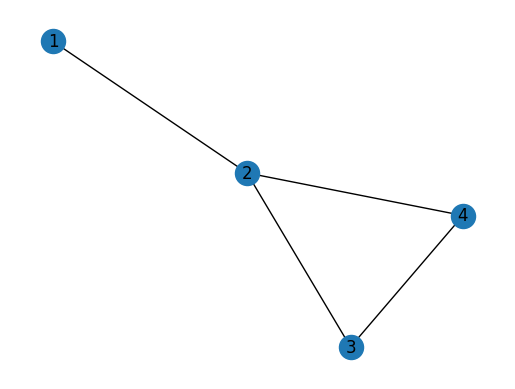

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
#Creating the graph
Graph = nx.Graph()
Graph.add_edges_from([(1, 2), (2, 3), (2, 4), (3, 4)])
fig, ax = plt.subplots()

nx.draw(Graph, ax=ax, with_labels=True)

plt.show()

# Here we have a graph with 4 Vertices and 4 Edges.
V = {1, 2, 3, 4}

E = {(1, 2), (2, 3), (2, 4), (3, 4)}

## Why should we care about graph theory?
Graphs are ultimately points in space connected by edges, so a problem regarding efficiency like distance travelled between two points can be answered using graph theory.  Think about google maps, you can setup a route with points you want to stop at, and then it calculates the best route. Graphs are a part of your daily life and you might not even know about it.

Another example is the knight in chess. They have to form a graph to get to a certain square on the chess board. 

Example:

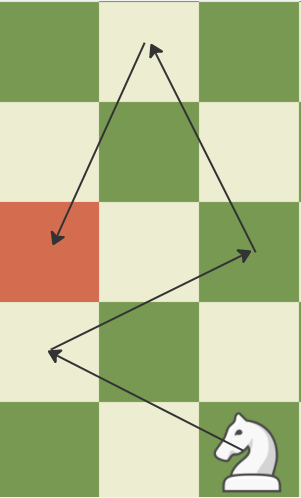

To anyone unfamiliar to chess the knight moves in an L shape, 2 squares horizontally/vertially and one to the side.

As you can see here, for the knight to get to the red square it needs to go through 3 different squares. These can be seen as our vertices (points) and the lines connecting them are edges.

 ***
 # Graph Isomorphism
 ***
Graph Isomorphism is reached when two graphs A and B have the same number of vertices and edges, and the edge connectivity is retained. 

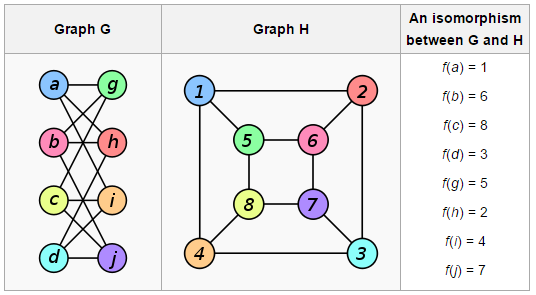
 
 

Graph G and H are Isomorphic as they have the same number of vertices and the edges are maintained

Another example of two isomorphic graphs:

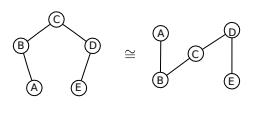

As you can see, both graphs have the same number of vertices and edges, and each vertex has the same connectivity to other vertices
***

# The Graph Isomorphism Problem
***
## What is the graph isomorphism Problem?
The graph isomorphism problem is that at this current time there is no algorithm made that shows if two graphs are isomorphic in polynomal time. This is a difficult task because when we have a graph with n vertices (points), n! (factorial) permutations (the number of ways a set/graph can be arranged) must be checked. The time needed to check this is O(2^n) which is exponential time.  

The best solution to this problem would be to find a way to check all of these permutations in O(n^2) time which is polynomal

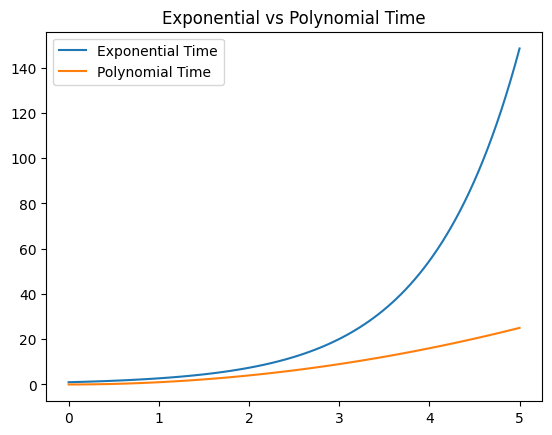

In [2]:
x_range = np.linspace(0, 5, 100)
#Generate y values for an exponential function
exp_y = np.exp(x_range)
#Generate y values for a polynomial function
poly_y = x_range ** 2
plt.plot(x_range, exp_y, label='Exponential Time')
plt.plot(x_range, poly_y, label='Polynomial Time')
plt.title('Exponential vs Polynomial Time')
plt.legend()
plt.show()


# László Babai
László Babai is a hungarian professor of Computer Science in the University of Chicago. László solved the graph isomorphism problem in quasipolynomal time. This is better than exponential time but not yet polynomal time.  

László's approach to solving this problem was to break the graph down into different segments and find irregularities in the graphs. If irregularities were found then the graphs were not isomorphic.

Laszlo used canonical colouring and canonical Partitioning to break the graphs down.

## Canonical Colouring 
Canonical Colouring is colouring the nodes based on their degree and neighbouring nodes.

Example:
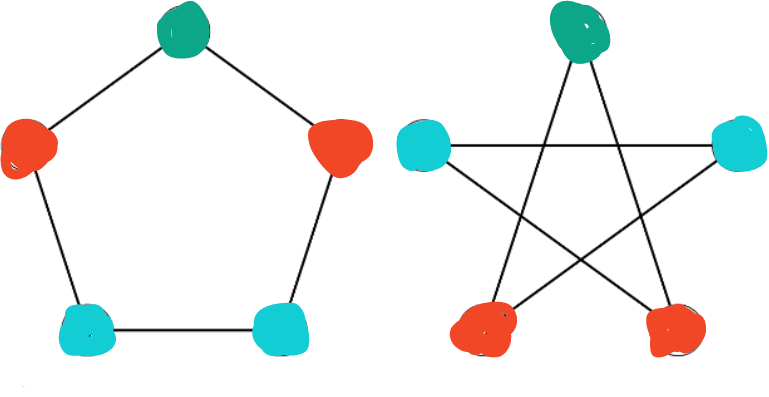
![graphs.gif](graphs.gif)

In this example all of the nodes are of degree 2 but we started off with the green node. We colour the first node in green and then its neighbours in red. These red nodes then have a neighbour each and we coloured those in blue and then the two nodes connect to eachother.  There are no irregularities with these two graphs so they are isomorphic.

## Canonical Partitioning
The Canonical Partitioning is a technique that is used to identify a canonical form of a given permutation which represent a vertex transitive graph, the algorithm works by partitioning the vertices of each graph into substructures based on their degree sequence and adjacency pattern.

Using these substructures the algorithm figures out if there is any irregularities between the two graphs and if there is then the graphs are not isomorphic.

By using the canonical partitioning technique, Laszlo's algorithm achieves a quasi-polynomial running time complexity of O(n^(log n)). This is not quite polynomal time but it is definitely better than exponential.

## Code implementation
Unfortunately there is no code yet that implements this algorithm to verify its time complexity and even if we did code it up  the quasipolynomial time complexity only guarantees reasonable running times for small inputs and the practical performance of the algorithm is still uncertain. Remember this is a Theoretical algorithm.

## Other Attempts to solve the problem
Laszlo's algorithm has been the biggest breakthrough in the graph isomorphism problem but there has been a few more attempts to solve it.

### Weisfeiler-Lehman Isomorphism test
Weisfeiler's test creates a canonical form for each graph. If the canonical forms of two graphs are not equivalent, then the graphs are definitively not isomorphic. However, it is possible for two non-isomorphic graphs to share a canonical form, so this test alone cannot provide evidence that two graphs are isomorphic.
This algorithm has an exponential speedup with n! but the speed all varies from graph to graph. László used this test as a baseline for his theory.

The algorithm iterates through the canonical forms of the graphs and follows certain steps. 

For each iteration we will assign the vertices a tuple L(i) where the first part is the vertex's last compressed label C(i-1) and the last part is a multiset of the vertex's neighbours' last compressed label C(i-1). 

At each iteration we will be assigning each node a new compressed label C(i) and this is based on its L(i). Any nodes with a smiliar L(i) will get the same compressed label. In the first Iteration this will be 1.


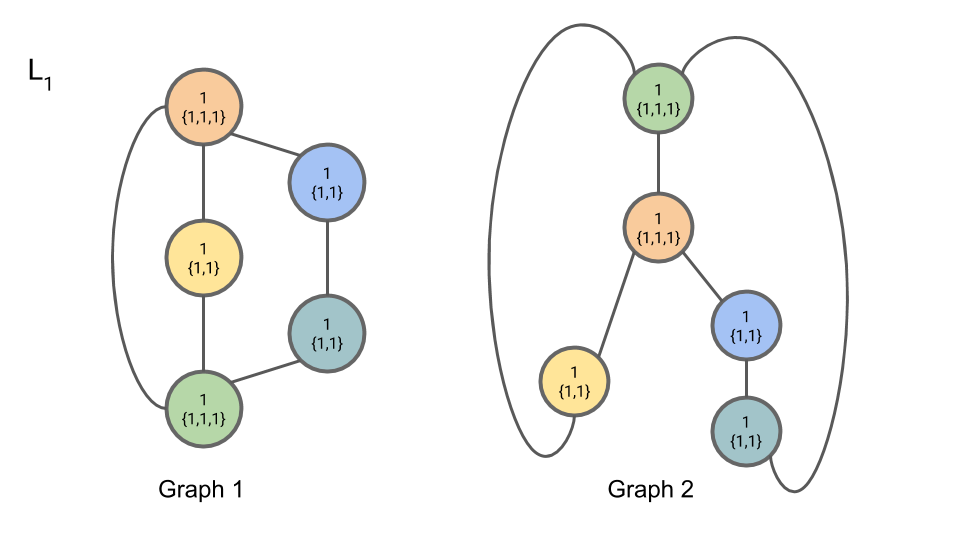

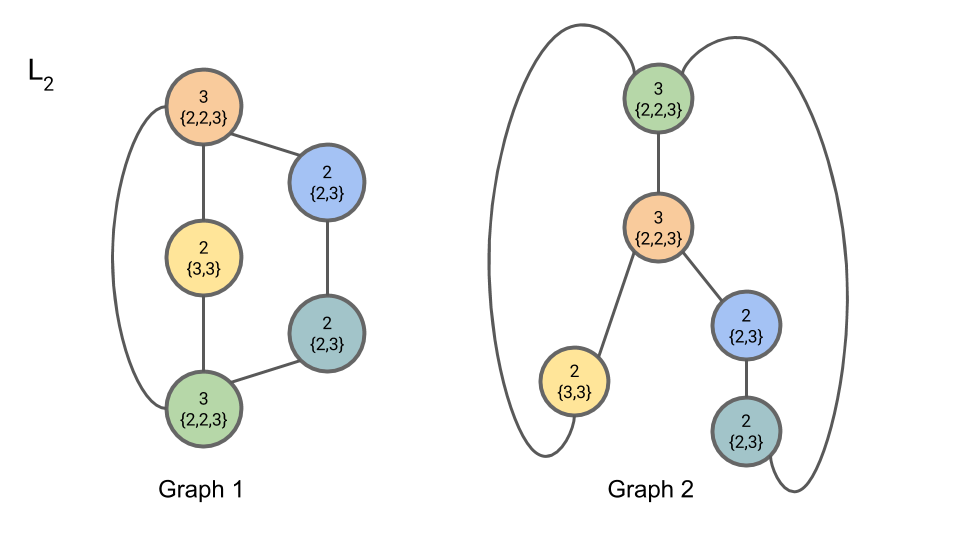

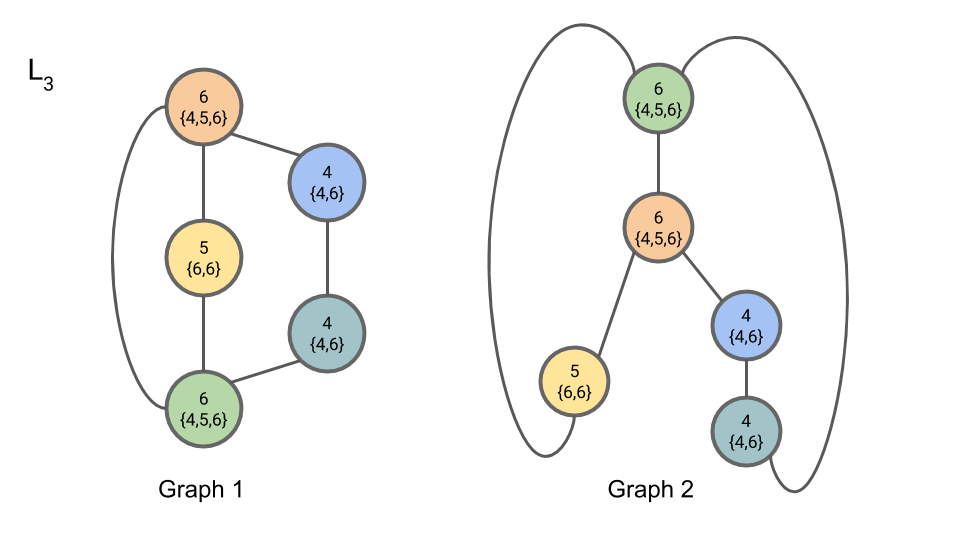

As you can see we are left with 2 fours, 1 five, an 2 sixes. This means that both graphs have the same canonical form but it doesn't necessarily mean that they are isomorphic.

***
### Monte Carlo Algorithm
The Monte Carlo Algorithm is a brute force algorithm. This means it uses probability to determine whether two graphs are isomorphic. The idea is to generate a large number of permutations of the vertices of each graph and compare the resulting graphs to see if they are isomorphic. This results in exponential time as we need to check n! vertices. This algorithm is one of the slow ones to test graph isomorphism.

The algorithm repeats these following steps:
1. Choose a random permutation of vertices for one graph
2. Check if the edges between vertices in the permutated graph correspond to the edges between the corresponding vertices in the other graph
3. If the permutation does preserve adjacency (vertices have the same edges between them) then the graphs are isomorphic.
4. If the permutation does not preserve adjacency, repeat steps 1 - 3

The algorithm will repeat these steps as many times as you ask it to, in the code below i set it to try 1000 permutations but this number can be altered.

In [3]:
#Monte Carlo Algorithm that returns true if the graphs are isomorphic and false if they are not
def test_isomorphism(G1, G2, num_samples=1000):
    #If the graphs have different lengths, they are not isomorphic
    if len(G1) != len(G2):
        return False

    n = len(G1)

    #Convert the graphs to numpy arrays for easier comparison 
    A = nx.convert_matrix.to_numpy_array(G1)
    B = nx.convert_matrix.to_numpy_array(G2)

    #Test isomorphism with random sample of permutations
    for i in range(num_samples):

        #Generate random permutation of length n (length of the graphs)
        perm = np.random.permutation(n)

        #We implement perm into graph 2 and compare it to the adjacency matrix of graph 1
        is_isomorphism = np.all(A == B[perm][:, perm])
        
        if is_isomorphism:
            return True
    
    return False


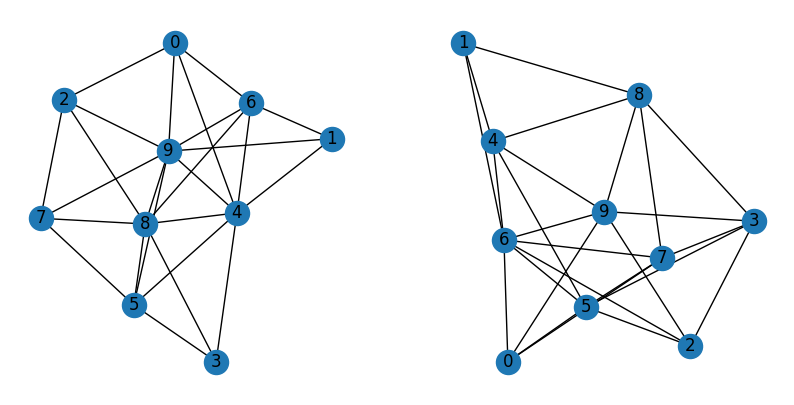

Are the graphs isomorphic:  False


In [4]:
numOfNodes = 10
numOfEdges = 25

#Generate a random graph called G1
G1 = nx.dense_gnm_random_graph(numOfNodes, numOfEdges)

#Generate another random graph called G2
G2 = nx.dense_gnm_random_graph(numOfNodes, numOfEdges)

#Plotting the graphs side by side to show they are isomorphic
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

nx.draw(G1, ax=ax[0], with_labels=True)
nx.draw(G2, ax=ax[1], with_labels=True)

plt.show()

print("Are the graphs isomorphic: ", test_isomorphism(G1, G2))


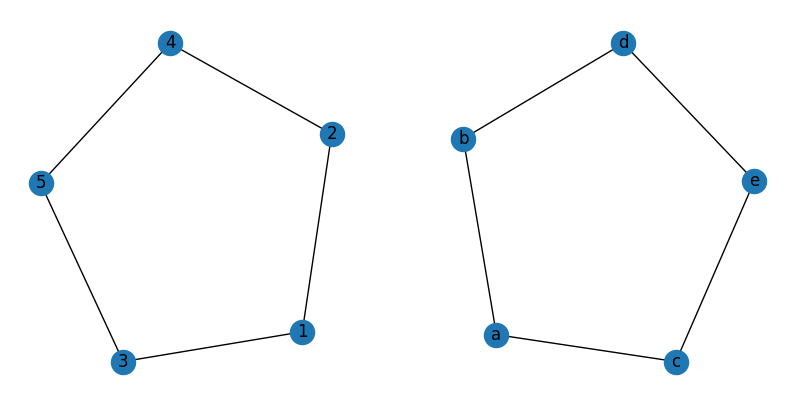

Are the graphs isomorphic:  True


In [5]:
#Creating graph 1
G1 = nx.Graph()
G1.add_edges_from([(1, 2), (1, 3), (2, 4), (3, 5), (4, 5)])

#Creating graph 2
G2 = nx.Graph()
G2.add_edges_from([('a', 'b'), ('a', 'c'), ('b', 'd'), ('c', 'e'), ('d', 'e')])

#Plotting the graphs side by side to show they are isomorphic
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

nx.draw(G1, ax=ax[0], with_labels=True)
nx.draw(G2, ax=ax[1], with_labels=True)

plt.show()

print("Are the graphs isomorphic: ", test_isomorphism(G1, G2))


***
# References
Weisfeiler-Lehman Test - https://davidbieber.com/post/2019-05-10-weisfeiler-lehman-isomorphism-test/ 

Graph Isomorphism problem - 

https://en.wikipedia.org/wiki/Graph_isomorphism_problem

https://people.cs.uchicago.edu/~laci/papers/icm18-babai.pdf

Monte Carlo algorithm - 

https://people.cs.uchicago.edu/~laci/lasvegas79.pdf

https://towardsdatascience.com/how-to-create-a-monte-carlo-simulation-using-python-c24634a0978a
